# Линейная регрессия

$$y = w_0 + W_1 x_1 + w_2 x_2 + ... + w_k x_k$$
$$y = \left\langle w, x \right\rangle $$
$y$ - целевая переменная   
$x$ - признаки  
$w$ - веса модели  

Предсказываем зависимость одной переменной от какого-то набора других переменных, выбирая правильные веса. 

#### В чем отличие задачи регрессии от задачи классификации?  
Классификаторы не обязаны возвращать вероятность, но дискретное число, скажем, класс, 0 или 1  

#### О чем свидетельствует нулевой вес отдельного коэффициента в линейной регрессии?
Нет линейной зависимости между целевой переменной и этим признаком

Чтобы хорошо обучаться - нам нужна функция ошибки, чтобы ее оптимизировать.  
Можно использовать mean absolute error

$$MAE = \displaystyle\frac{1}{n}\sum_{t=1}^{N}|y_i - \hat y |$$

$N$ - размер выборки  
$y_i$ - корректный ответ  
$\hat y$ - наше предсказание

Это достаточно хорошая и интерпретируемая функция потерь, правда она не дифференцируема, поэтому ее нельзя использовать в случае градиентного спуска или методах градиентной оптимизации. Поэтому обычно используются другие более сложные и немного другие функции. 

MSE делает тоже самое, только усредняет квадраты расстояний наших предсказаний от реальных ответов. Ее можно оптимизировать, дифференцировать. И MSE часто используется в методах градиентного спуска. 

$$MAE = \displaystyle\frac{1}{n}\sum_{t=1}^{N}(y_i - \hat y )^2$$

$N$ - размер выборки  
$y_i$ - корректный ответ  
$\hat y$ - наше предсказание

Однако в случае регрессии мы можем решать задачу и аналитически, не обязательно используя градиентный спуск. Но в пространствах большой размерности приходится вращать сложными матрицами и не всегда это работает. 

# Логистическая регрессия

Какая функция используется для получения вероятности принадлежности классу в двуклассовой логистической регрессии?  
sigmoid  

# Линейные модели 

In [5]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn import datasets

Задача регрессии - предсказание вещественной переменной.

Импортируем датасет "boston", в котором содержится информация о цене, характеристиках домов в районе Бостона.

In [6]:
boston = datasets.load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

Выведем описание датасета

In [7]:
print(boston.DESCR[100:1300])

tics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks 

MEDV     Median value of owner-occupied homes in $1000's  
  
это наша целевая переменная.  Цена дома в тысячах долларов. 

То есть используя все эти переменные хотелось бы предсказывать среднюю стоимость дома. 

Посмотрим на наш датасет: 

In [10]:
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


В данном датасете у нас только числа. Мы можем решать эту задачу с помощью линейной регрессии. 

Посмотрим на среднюю стоимость дома (`boston.target`) с помощью метода "displot" библиотеки "seaborn":

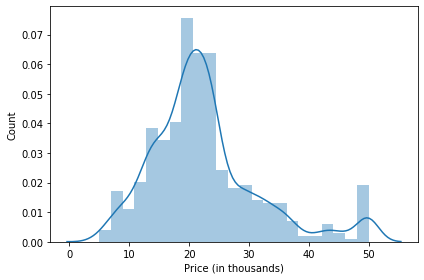

In [18]:
plt.figure(figsize=(6,4))
sns.distplot(boston.target)

plt.xlabel('Price (in thousands)')
plt.ylabel('Count')
plt.tight_layout()

Как видно из гистограммы - средняя цена домов в районе 20-30 тысяч.

Импортируем из модуля sklearn.linear_model класс LinearRegression

In [20]:
from sklearn.linear_model import LinearRegression 

# создаем экземпляр класса LinearRegression, т.е. объект
linear_regression = LinearRegression()

# чтобы обучить модель, используем метод 'fit'
model = linear_regression.fit(boston.data, boston.target)

В качестве параметров к методу `fit`, мы передаем датасет `boston.data`, а так же целевую переменную `boston.target`. 

Мы обучили модель и сохранили ее состояние в переменную `model`.

Теперь посмотрим как обучилась линейная регрессия.

Переменная `model` хранит в себе коэффициенты в атрибуте `coef_`

In [23]:
model.coef_

array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01])

Объект `boston` имеет атрибут `feature_names` с именами колонок

In [35]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

С помощью функции `zip` можно объединить имена колонок и коэффициенты

In [27]:
zip(boston.feature_names, model.coef_)

Получится список кортежей пар (наименование коэффициента, вес(значение) коэффициента)

In [39]:
list(zip(boston.feature_names, model.coef_))

[('CRIM', -0.10801135783679539),
 ('ZN', 0.04642045836687953),
 ('INDUS', 0.020558626367068917),
 ('CHAS', 2.6867338193448442),
 ('NOX', -17.766611228299986),
 ('RM', 3.8098652068092282),
 ('AGE', 0.0006922246403431768),
 ('DIS', -1.47556684560025),
 ('RAD', 0.30604947898516427),
 ('TAX', -0.012334593916574021),
 ('PTRATIO', -0.9527472317072921),
 ('B', 0.00931168327379375),
 ('LSTAT', -0.5247583778554881)]

Теперь преобразуем все это в датафрейм для удобной работы и отображения в табличном виде

In [31]:
feauture_weight_df = pd.DataFrame(list(zip(boston.feature_names, model.coef_)))
feauture_weight_df

,0,1
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


Переименуем имена колонок датафрейма

In [41]:
feauture_weight_df.columns = ['Feature', 'Weight']
feauture_weight_df

,Feature,Weight
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


In [42]:
print(feauture_weight_df)

    Feature     Weight
0      CRIM  -0.108011
1        ZN   0.046420
2     INDUS   0.020559
3      CHAS   2.686734
4       NOX -17.766611
5        RM   3.809865
6       AGE   0.000692
7       DIS  -1.475567
8       RAD   0.306049
9       TAX  -0.012335
10  PTRATIO  -0.952747
11        B   0.009312
12    LSTAT  -0.524758


Линейная регрессия разбрасывает веса каждому признаку для того чтобы оценить какой вклад вносят признаки для предсказания количественной переменной. Таким образом если мы перемножим все веса с нашими признаками, то мы получим нашу целевую переменную - т.е. среднюю цену дома. Оценивать абсолютные значения весов не стоит, так как данные не нормализованы. Если привести в данные к какому-то порядку, можно было бы посмотреть как они вносят вклад в предсказательную способность нашей модели. 

Теперь попробуем вручную произвести предсказание, возьмем как пример первую строку из датасета `boston`.

In [43]:
boston.data[0]

array([6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
       6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
       4.980e+00])

In [44]:
model.coef_

array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01])

In [45]:
zip(model.coef_, boston.data[0])

In [53]:
for i in zip(model.coef_, boston.data[0]):
    print(i)

(-0.10801135783679539, 0.00632)
(0.04642045836687953, 18.0)
(0.020558626367068917, 2.31)
(2.6867338193448442, 0.0)
(-17.766611228299986, 0.538)
(3.8098652068092282, 6.575)
(0.0006922246403431768, 65.2)
(-1.47556684560025, 4.09)
(0.30604947898516427, 1.0)
(-0.012334593916574021, 296.0)
(-0.9527472317072921, 15.3)
(0.00931168327379375, 396.9)
(-0.5247583778554881, 4.98)


In [57]:
sum_attributes = 0

for i in range(len(model.coef_)):
    sum_attributes+= model.coef_[i] * boston.data[0][i]
    
print(sum_attributes)

-6.455645008073041


Как это можно записать красивее?

Импортируем модуль `operator`. У модуля есть метод `mul`, который перемножает два входящих параметра. 

In [60]:
import operator

print(operator.mul(2, 4))

8


Применим функцию `map`, с помощью которой можно применить другую функцию и вернуть итератор.

In [62]:
for i in map(lambda pair: operator.mul(*pair), zip(model.coef_, boston.data[0])):
    print(i)

-0.0006826317815285468
0.8355682506038316
0.0474904269079292
0.0
-9.558436840825394
25.049863734770675
0.04513304655037513
-6.035068398505023
0.30604947898516427
-3.6510397993059103
-14.577032645121571
3.695807091368739
-2.6132967217203307
